In [369]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.model_selection import StratifiedKFold, cross_val_score


In [370]:
file_name = '2025-VeloCityX-Expanded-Fan-Engagement-Data.csv'
df = pd.read_csv(file_name)

In [371]:
df.head()

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


In [372]:
df.drop(columns=['User ID'], inplace=True)

In [373]:
df.dtypes

Fan Challenges Completed                   int64
Predictive Accuracy (%)                    int64
Virtual Merchandise Purchases              int64
Sponsorship Interactions (Ad Clicks)       int64
Time on Live 360 (mins)                    int64
Real-Time Chat Activity (Messages Sent)    int64
dtype: object

In [374]:
df.describe()

,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.790000,74.990000,2.670000,8.680000,129.350000,25.050000
std,2.825908,14.033506,2.064882,6.340315,38.634358,14.163101
min,1.000000,50.000000,0.000000,0.000000,60.000000,0.000000
25%,3.000000,62.000000,1.000000,2.000000,98.000000,11.000000
50%,6.000000,77.000000,2.000000,8.000000,124.500000,25.500000
75%,8.000000,86.500000,5.000000,15.000000,160.000000,35.000000
max,10.000000,98.000000,6.000000,19.000000,199.000000,49.000000


In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Fan Challenges Completed                 100 non-null    int64
 1   Predictive Accuracy (%)                  100 non-null    int64
 2   Virtual Merchandise Purchases            100 non-null    int64
 3   Sponsorship Interactions (Ad Clicks)     100 non-null    int64
 4   Time on Live 360 (mins)                  100 non-null    int64
 5   Real-Time Chat Activity (Messages Sent)  100 non-null    int64
dtypes: int64(6)
memory usage: 4.8 KB


In [376]:
scalar = StandardScaler()
df_scaled = scalar.fit_transform(df)

In [377]:
# Finding the optimal number of clusters
inertia = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    print(f'Inertia for {i} clusters is {kmeans.inertia_}, diference is {inertia[i-1] - inertia[i-2]}')

Inertia for 1 clusters is 600.0, diference is 0.0
Inertia for 2 clusters is 511.100252920086, diference is -88.899747079914
Inertia for 3 clusters is 446.8382589717423, diference is -64.26199394834373
Inertia for 4 clusters is 394.4655917741497, diference is -52.37266719759259
Inertia for 5 clusters is 371.0933668917045, diference is -23.37222488244521
Inertia for 6 clusters is 345.698906314284, diference is -25.39446057742049
Inertia for 7 clusters is 310.44676583612915, diference is -35.25214047815484
Inertia for 8 clusters is 288.4884519390233, diference is -21.958313897105825
Inertia for 9 clusters is 269.77769943584633, diference is -18.71075250317699
Inertia for 10 clusters is 262.7054975102325, diference is -7.072201925613854
Inertia for 11 clusters is 247.91836902240104, diference is -14.787128487831438
Inertia for 12 clusters is 230.3877784537326, diference is -17.53059056866843
Inertia for 13 clusters is 215.34483559806205, diference is -15.04294285567056
Inertia for 14 clust

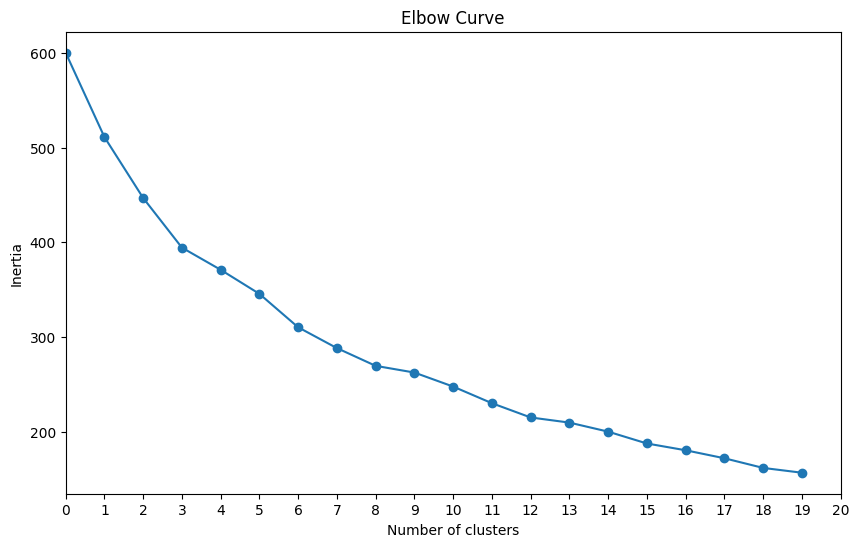

In [378]:
# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(inertia, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.xlim(0, 20)
plt.xticks(np.arange(0, 21, 1))
plt.ylabel('Inertia')
plt.show()

So the best number of clusters are in between 3 and 5. For this project, I will choose 4

In [379]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_scaled)
df['Cluster'] = kmeans.labels_

In [380]:
df.head()

,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent),Cluster
0,5,80,3,10,120,20,1
1,8,60,1,8,100,35,3
2,3,90,0,6,90,5,2
3,7,70,2,15,140,40,0
4,2,50,5,3,60,8,3


In [381]:
cluster_summary = df.groupby('Cluster').mean()  
cluster_summary

,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
Cluster,,,,,,
0,3.678571,75.785714,2.285714,14.535714,119.000000,34.000000
1,7.806452,83.322581,3.935484,10.451613,141.064516,22.580645
2,4.090909,77.681818,1.318182,2.590909,139.363636,14.136364
3,7.578947,57.105263,2.736842,4.210526,113.894737,28.526316


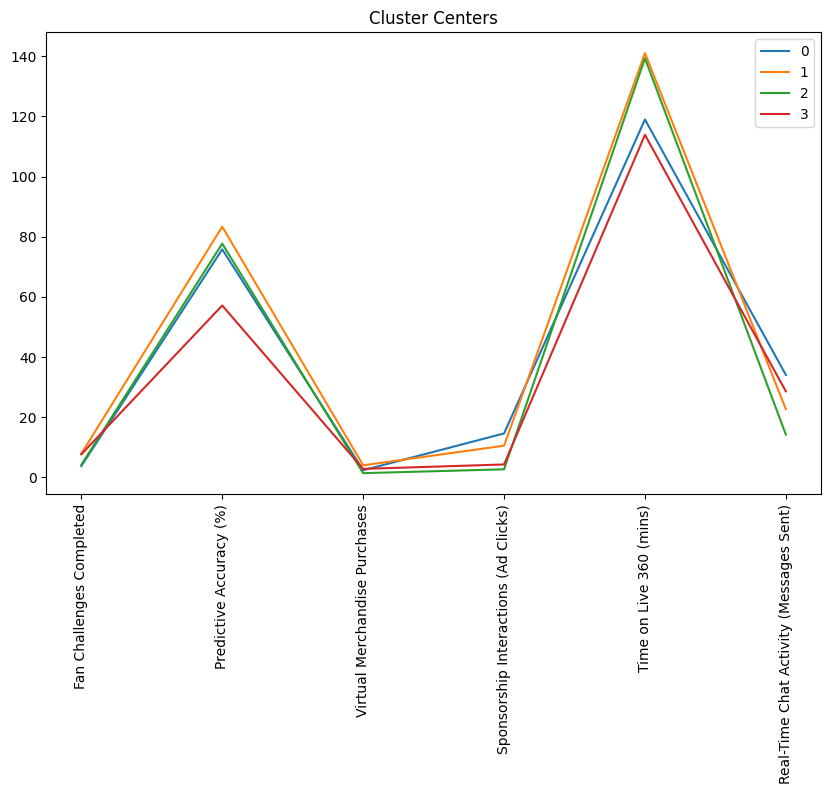

In [382]:
# Plotting the Cluster Centers
plt.figure(figsize=(10, 6))
plt.plot(cluster_summary.T)
plt.title('Cluster Centers')
plt.xticks(rotation=90)
plt.legend(cluster_summary.index)
plt.show()

In [383]:
# Feature Engineering
df["High Purchase"] = (df["Virtual Merchandise Purchases"] > 2).astype("int64") # High Purchase is defined as Purchase > 2
# Engagement Score is defined as the product of Time on Live 360 (mins) and Real-Time Chat Activity (Messages Sent)
df['Engagement_Score'] = df['Time on Live 360 (mins)'] * df['Real-Time Chat Activity (Messages Sent)']
df['Engagement_Score'] = df['Engagement_Score'] / df['Engagement_Score'].max()

In [384]:
# We will also use Polynomial Features to allow interaction terms
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df[['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)', 'Engagement_Score']])

# Redefining X and y with the engineered features
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out())
y = df["High Purchase"]

In [385]:
df['High Purchase'].value_counts()

High Purchase
0    51
1    49
Name: count, dtype: int64

In [386]:
X_poly_df.columns

Index(['Fan Challenges Completed', 'Predictive Accuracy (%)',
       'Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)',
       'Real-Time Chat Activity (Messages Sent)', 'Engagement_Score',
       'Fan Challenges Completed^2',
       'Fan Challenges Completed Predictive Accuracy (%)',
       'Fan Challenges Completed Sponsorship Interactions (Ad Clicks)',
       'Fan Challenges Completed Time on Live 360 (mins)',
       'Fan Challenges Completed Real-Time Chat Activity (Messages Sent)',
       'Fan Challenges Completed Engagement_Score',
       'Predictive Accuracy (%)^2',
       'Predictive Accuracy (%) Sponsorship Interactions (Ad Clicks)',
       'Predictive Accuracy (%) Time on Live 360 (mins)',
       'Predictive Accuracy (%) Real-Time Chat Activity (Messages Sent)',
       'Predictive Accuracy (%) Engagement_Score',
       'Sponsorship Interactions (Ad Clicks)^2',
       'Sponsorship Interactions (Ad Clicks) Time on Live 360 (mins)',
       'Sponsorship Interactio

In [387]:
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly_df)

In [396]:
train_X, test_X, train_y, test_y = train_test_split(X_poly_scaled, y, test_size=0.1, random_state=42)

In [397]:
from sklearn.linear_model import LinearRegression

# Setting up the linear regression model
linear_regression_model = LinearRegression()

# Fitting the model on the scaled polynomial features (interaction terms included)
linear_regression_model.fit(train_X, train_y)



LinearRegression()

In [398]:
# Making predictions
y_pred = linear_regression_model.predict(test_X)

# Evaluating the performance of the linear regression model
# Since it's a binary classification task
y_pred_rounded = (y_pred > 0.5).astype(int)

# Generating a classification report for the linear regression model
linear_regression_report = classification_report(test_y, y_pred_rounded, zero_division=0)


In [399]:
print(linear_regression_report)

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.60      0.60      0.60         5

    accuracy                           0.60        10
   macro avg       0.60      0.60      0.60        10
weighted avg       0.60      0.60      0.60        10



In [367]:
# pPrint the coefficients with the feature names
coeficients = pd.DataFrame(
    linear_regression_model.coef_, columns=['Coefficient'],
    index=X_poly_df.columns)

In [368]:
print(repr(coeficients))

                                                    Coefficient
Fan Challenges Completed                              -0.437430
Predictive Accuracy (%)                               -0.397891
Sponsorship Interactions (Ad Clicks)                  -0.893393
Time on Live 360 (mins)                               -1.399816
Real-Time Chat Activity (Messages Sent)               -4.162691
Engagement_Score                                       4.762826
Fan Challenges Completed^2                             0.088934
Fan Challenges Completed Predictive Accuracy (%)       0.794163
Fan Challenges Completed Sponsorship Interactio...    -0.064329
Fan Challenges Completed Time on Live 360 (mins)      -0.225998
Fan Challenges Completed Real-Time Chat Activit...    -0.387297
Fan Challenges Completed Engagement_Score              0.136012
Predictive Accuracy (%)^2                             -0.015632
Predictive Accuracy (%) Sponsorship Interaction...     0.642345
Predictive Accuracy (%) Time on Live 360

### 1. Which users are most likely to purchase virtual merchandise? ###

Based on the analysis and the coefficients from the linear-regression model:

    1. Engagement Score (a combination of Time on Live 360 (mins) and Real-Time Chat Activity (Messages Sent)) is the strongest positive predictor of high merchandise purchases. Users with high engagement scores are most likely to purchase virtual merchandise.

    2. Fan Challenges Completed and Predictive Accuracy (%): Completing more fan challenges and achieving higher predictive accuracy, when combined, also increase the likelihood of purchasing virtual merchandise.
	
    3. Users with High Interaction: Users who have both moderate to high predictive accuracy and spend more time engaged (especially with high chat activity during race events) are more likely to make purchases.

### 2. How do user activities during race events correlate with their merchandise purchases and sponsorship interaction? ###

There is a complex relationship between user activities and merchandise purchases:

    1. Time on Live 360 (mins):
        Users who spend more time on live events tend to make more purchases, but only up to a certain point. After a threshold, excessive time spent (especially when not combined with other forms of interaction) may not lead to higher purchases.

    2. Real-Time Chat Activity (Messages Sent):
        Chat activity shows a similar trend: moderate chatters are more likely to make purchases, but extremely high chat activity (as indicated by the negative interaction term) can be a signal of less likelihood of purchasing, potentially due to users focusing more on social engagement than merchandise buying.
        However, when combined with Engagement Score, it significantly improves the likelihood of making purchases, especially for users who are both highly active in live events and chat.

    3. Sponsorship Interactions (Ad Clicks):
        Surprisingly, more sponsorship interactions (ad clicks) seem negatively correlated with high merchandise purchases. This could suggest that users who focus on interacting with sponsorship content are less inclined to purchase virtual merchandise, perhaps because their attention is more directed at the ads or offers rather than the merchandise itself.

### Other Correlations ###

Predictive Accuracy (%) and Merchandise Purchases:

    Mixed Relationship: The direct coefficient for predictive accuracy is slightly negative, which implies that users with higher accuracy in predictions may not always correlate with higher merchandise purchases. This could suggest that users who are more focused on winning or accuracy are less interested in buying merchandise.
	
    However, when combined with other features (like fan challenges completed), predictive accuracy can have a positive impact on purchases. This indicates that users who participate in challenges and have higher predictive accuracy are more likely to make purchases compared to those who are only focused on predictions alone.

Time on Live 360 (mins) and Real-Time Chat Activity (Messages Sent):

    Positive Quadratic Effects: Both time spent on live events and chat activity have quadratic terms that positively correlate with purchases. This means that while moderate engagement is good, extreme engagement leads to diminishing returns initially. However, once a certain level of engagement is crossed, the purchase likelihood goes up significantly again.
	
    High Chatters: Users who engage deeply with real-time chat activity tend to make purchases, but only up to a point. After that, excessive chat activity could be more of a social engagement rather than indicative of a buying intent. Combining chat activity with live event time leads to better outcomes.